In [24]:
import os
import glob
import random
import csv
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
from sklearn.model_selection import train_test_split
from joblib import dump
from joblib import load
seed = 42
random.seed(seed)

In [4]:
! git clone https://github.com/soerenab/AudioMNIST.git

fatal: destination path 'AudioMNIST' already exists and is not an empty directory.


In [27]:
def write_metadata(filename,list):
  with open(f'{filename}', 'w', newline='') as file:
    for path in list:
        file.write("%s\n" % list)

In [6]:
with open('/content/AudioMNIST/data/audioMNIST_meta.txt', 'r') as file:
    dict_str = file.read()
    dictionary = eval(dict_str)
print("Dictionary from file:", dictionary)

Dictionary from file: {'01': {'accent': 'german', 'age': 30, 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Wuerzburg', 'recordingdate': '17-06-22-11-04-28', 'recordingroom': 'Kino'}, '02': {'accent': 'German', 'age': '25', 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Hamburg', 'recordingdate': '17-06-26-17-57-29', 'recordingroom': 'Kino'}, '03': {'accent': 'German', 'age': '31', 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Bremen', 'recordingdate': '17-06-30-17-34-51', 'recordingroom': 'Kino'}, '04': {'accent': 'German', 'age': '23', 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Helmstedt', 'recordingdate': '17-06-30-18-09-14', 'recordingroom': 'Kino'}, '05': {'accent': 'German', 'age': '25', 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Hameln', 'recordingdate': '17-07-06-10-53-10', 'recordingroom': 'Kino'}, '06': {'accent': 'German', 'age': '25', 'gender': 'male',

In [8]:
root_directory = 'AudioMNIST/data/'
dataset = []
for dirpath, dirnames, filenames in os.walk(root_directory):
    wav_files = glob.glob(os.path.join(dirpath, '*.wav'))

    if wav_files:
        for wav_file in wav_files:
          file_path = os.path.basename(wav_file)
          last_part = file_path.split("_")
          label = last_part[0]
          speaker_id = last_part[1]
          gender = dictionary[f'{speaker_id}']['gender']
          if gender == 'male':
            gender = 0
          else:
            gender = 1
          samplerate, data = wavfile.read(str(wav_file))
          data = librosa.resample(data.astype(float),orig_sr=samplerate,target_sr=16000)
          dataset.append([data,file_path,speaker_id,gender,label])
          del data

In [80]:
labels = np.array([0,1,2,3,4,5,6,7,8,9])
np.save('audiomnist_labels.npy', labels)

## Example from dataset

---

In [11]:
sample_rate = 16000
waveform = dataset[120][0]

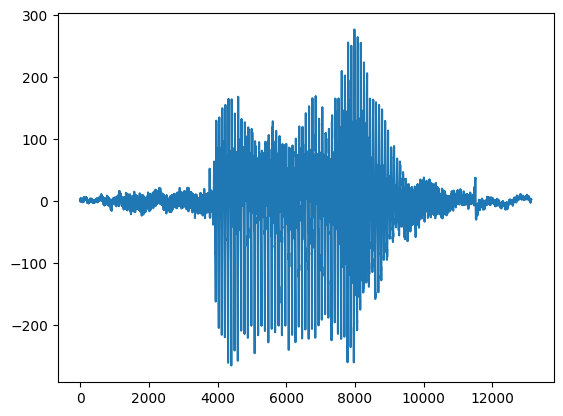

In [12]:
plt.plot(waveform)
ipd.Audio(waveform, rate=sample_rate)

---

In [13]:
x_train, x_test = train_test_split(dataset,random_state=seed, test_size=0.20,shuffle=True)

In [21]:
type(x_train),type(x_test)

(list, list)

In [17]:
x_train

[[array([-13.82685184, -22.78841019, -19.49763489, ...,   8.50228882,
          12.15809345,   0.        ]),
  '1_44_38.wav',
  '44',
  'male',
  '1'],
 [array([ 2.96236324,  6.18747139,  5.78706837, ..., -3.74942183,
         -4.72776508,  0.        ]),
  '8_60_18.wav',
  '60',
  'female',
  '8'],
 [array([  1.0726614 ,   1.97132397,   1.86830139, ..., -10.18867588,
          -9.5937252 ,  -8.37297726]),
  '8_27_10.wav',
  '27',
  'male',
  '8'],
 [array([-16.67615318, -25.95861435, -22.55925179, ..., -15.66071796,
         -15.82701778, -15.72113132]),
  '6_10_40.wav',
  '10',
  'male',
  '6'],
 [array([-4.3747468 , -8.73567009, -8.1607914 , ..., -4.63158703,
         -4.27313328, -1.8819015 ]),
  '6_14_28.wav',
  '14',
  'male',
  '6'],
 [array([11.40951538, 18.23870277, 17.16121292, ..., 15.47066498,
         19.72909927, 17.39139557]),
  '2_45_24.wav',
  '45',
  'male',
  '2'],
 [array([-0.943326  ,  0.61910319,  2.38969564, ..., -1.11288559,
         -0.01082811,  0.        ]),
 

In [28]:
metadata_train = []
for i in range(len(x_train)):
  metadata_train.append(x_train[i][1])

In [29]:
metadata_test = []
for i in range(len(x_test)):
  metadata_test.append(x_test[i][1])

In [31]:
write_metadata('audioMNIST_metadata_train.csv',metadata_train)

In [32]:
write_metadata('audioMNIST_metadata_test.csv',metadata_test)

In [23]:
dump(x_train, 'audioMNIST_train.joblib')
dump(x_test, 'audioMNIST_test.joblib')

['audioMNIST_test.joblib']

In [25]:
loaded_train = load('audioMNIST_train.joblib')
loaded_test = load('audioMNIST_test.joblib')

In [26]:
loaded_train

[[array([-13.82685184, -22.78841019, -19.49763489, ...,   8.50228882,
          12.15809345,   0.        ]),
  '1_44_38.wav',
  '44',
  'male',
  '1'],
 [array([ 2.96236324,  6.18747139,  5.78706837, ..., -3.74942183,
         -4.72776508,  0.        ]),
  '8_60_18.wav',
  '60',
  'female',
  '8'],
 [array([  1.0726614 ,   1.97132397,   1.86830139, ..., -10.18867588,
          -9.5937252 ,  -8.37297726]),
  '8_27_10.wav',
  '27',
  'male',
  '8'],
 [array([-16.67615318, -25.95861435, -22.55925179, ..., -15.66071796,
         -15.82701778, -15.72113132]),
  '6_10_40.wav',
  '10',
  'male',
  '6'],
 [array([-4.3747468 , -8.73567009, -8.1607914 , ..., -4.63158703,
         -4.27313328, -1.8819015 ]),
  '6_14_28.wav',
  '14',
  'male',
  '6'],
 [array([11.40951538, 18.23870277, 17.16121292, ..., 15.47066498,
         19.72909927, 17.39139557]),
  '2_45_24.wav',
  '45',
  'male',
  '2'],
 [array([-0.943326  ,  0.61910319,  2.38969564, ..., -1.11288559,
         -0.01082811,  0.        ]),
 

In [5]:
samplerate

48000